# Word Cloud for Textual data analysis

The motivation of this notebook is to understand how textual data can be analysed using Word Cloud in python. Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.  
  
To install the packages, run the following command: 
#### pip install wordcloud

#### Dataset: https://www.kaggle.com/albenft/game-of-thrones-script-all-seasons
The above dataset is used for performing textual data analysis.

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

%matplotlib inline

### Loading the Dataset

In [2]:
got_data = pd.read_csv('data/got_data.csv')

got_data.shape

(23911, 6)

There are 23911 rows and 6 columns.

In [3]:
got_data.head(3)

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?


### Data Analysis
#### Let's check the number of null values in the dataset

In [4]:
got_data.isna().sum()

Release Date     0
Season           0
Episode          0
Episode Title    0
Name             3
Sentence         0
dtype: int64

We have 3 items in column 'Name' as Null. We could delete and continue further on the remaining 23908 rows.

In [5]:
got_data.dropna(inplace = True)

got_data.shape

(23908, 6)

#### Given this dataset, Let's check the how many dialogues did each actor(top 10) have? 

In [6]:
got_data['Name'].value_counts().head(10)

tyrion lannister      1760
jon snow              1133
daenerys targaryen    1048
cersei lannister      1005
jaime lannister        945
sansa stark            784
arya stark             783
davos                  528
theon greyjoy          455
petyr baelish          449
Name: Name, dtype: int64

#### Let's try to find the most frequently used words in all the dialogues

(-0.5, 999.5, 999.5, -0.5)

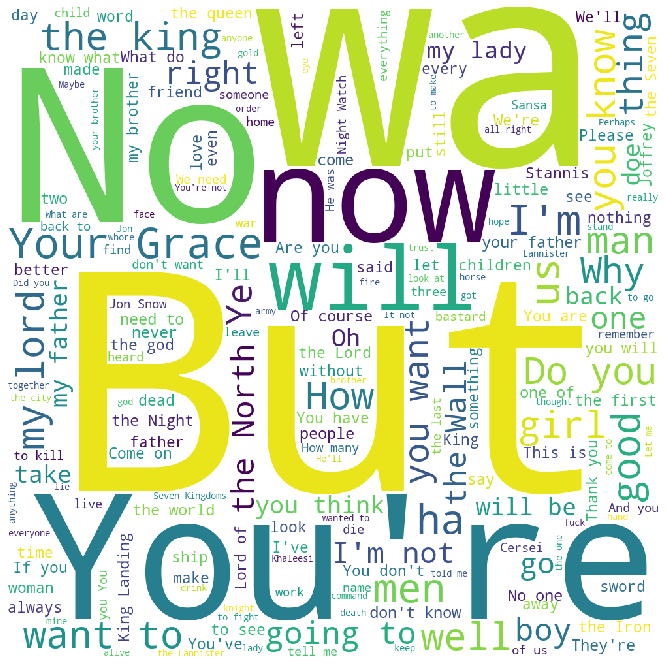

In [7]:
wordcloud = WordCloud(width = 1000, height = 1000, stopwords = STOPWORDS, min_font_size = 10, background_color = 'white').generate(
    ' '.join(k for k in got_data['Sentence']))
plt.figure(figsize = (12,12))
plt.imshow(wordcloud) 
plt.axis("off") 

the North, Your Grace, the King, my lord, men, sword, King's landing... Ok pretty much covers few which I heard in the series ;)

#### Let's try to find the most common words used by Arya Stark in the sixth season!

In [8]:
df1 = got_data[(got_data['Name'] == 'arya stark') & (got_data['Season'] == 'Season 6')]
df1.shape

(60, 6)

(-0.5, 399.5, 199.5, -0.5)

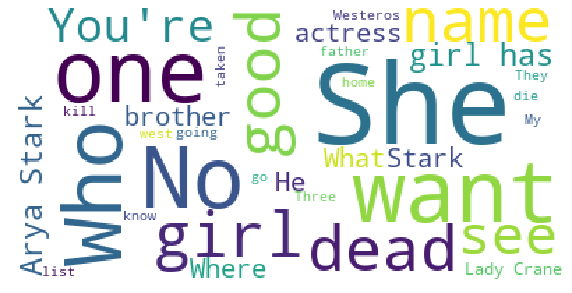

In [9]:
wordcloud = WordCloud(stopwords = STOPWORDS, min_font_size = 10, background_color = 'white').generate(
    ' '.join(k for k in df1['Sentence']))
plt.figure(figsize = (10,8))
plt.imshow(wordcloud) 
plt.axis("off") 

#### Let's try to find the most common words used by Daenerys Targaryen  in her dialogues

In [10]:
df2 = got_data[got_data['Name'] == 'daenerys targaryen']
df2.shape

(1048, 6)

(-0.5, 399.5, 199.5, -0.5)

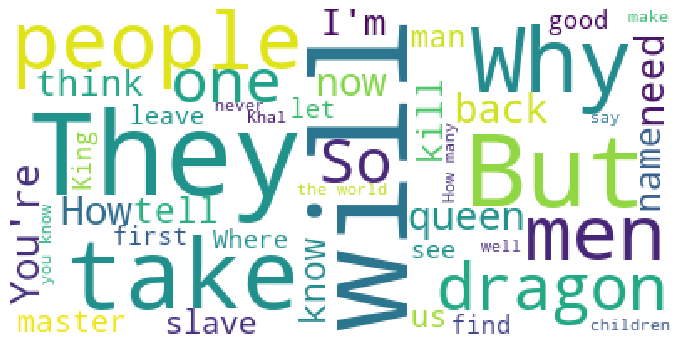

In [11]:
wordcloud = WordCloud(stopwords = STOPWORDS, min_font_size = 10, background_color = 'white').generate(
    ' '.join(k for k in df2['Sentence']))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud) 
plt.axis("off") 

I wonder why I don't see 'dracarys' :P 

#### Reference : https://www.geeksforgeeks.org/generating-word-cloud-python/